In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load csv
franceDataset = pd.read_csv("../../Datasets/Francia/france_clean.csv")
italiaDataset = pd.read_csv("../../Datasets/ProtezioneCivile/dpc-covid19-ita-andamento-nazionale_clean.csv")
mondoDataset = pd.read_csv("../../Datasets/Kaggle/covid_19_clean_complete_clean.csv")

In [24]:
franceLastday = franceDataset["date"].max()
italiaLastday = italiaDataset["data"].max()
date = mondoDataset["Date"].unique().tolist()
mondoLastdate = max(date)

minDay = min(franceLastday, italiaLastday, mondoLastdate)

In [25]:
dataset = franceDataset[franceDataset["maille_nom"] == "France"]
franceData = dataset[dataset["date"] == minDay].loc[:,["date", "cas_confirmes", "gueris", "deces"]]

In [26]:
lastday = italiaDataset["data"].max()
italiaData = italiaDataset[italiaDataset["data"] == minDay].loc[:,["data", "totale_casi", "dimessi_guariti", "deceduti"]]

In [27]:
lastDay = mondoDataset[mondoDataset['Date'] == minDay]

summedConfirmed = lastDay.groupby(['Country/Region'])['Confirmed'].sum()
summedRecovered = lastDay.groupby(['Country/Region'])['Recovered'].sum()
summedDeaths = lastDay.groupby(['Country/Region'])['Deaths'].sum()

mondoConfermati = summedConfirmed.sum()
mondoGuariti = summedRecovered.sum()
mondoDeceduti = summedDeaths.sum()

data = {'Date': [minDay], 'Confirmed': [mondoConfermati], 'Recovered': [mondoGuariti], 'Deaths': [mondoDeceduti]}
mondoData = pd.DataFrame(data)

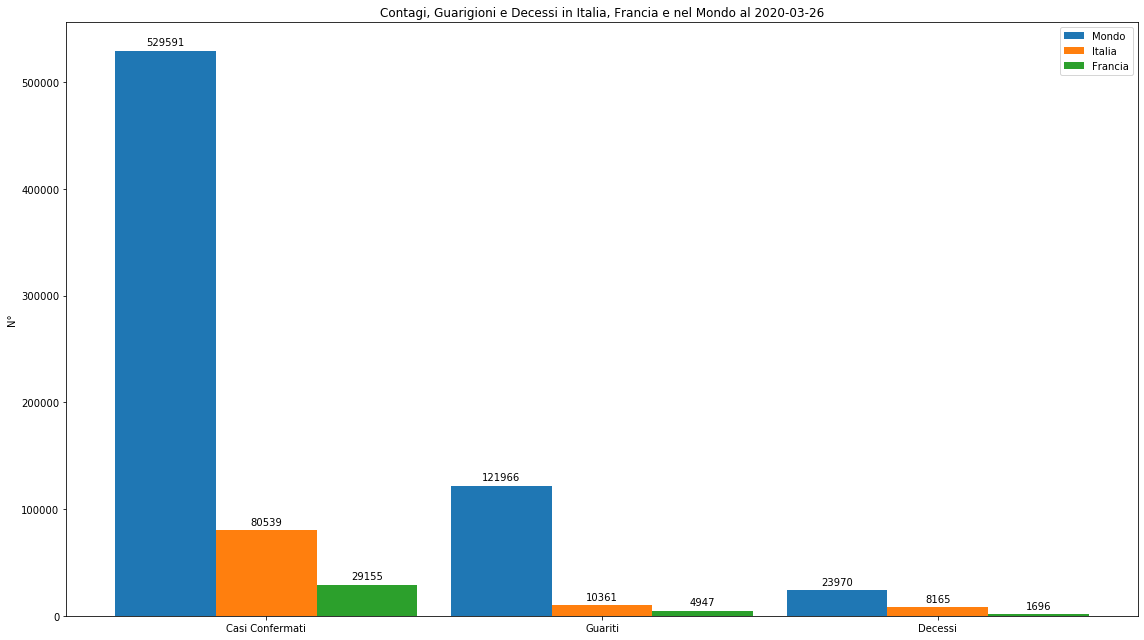

In [28]:
labels = ['Casi Confermati', 'Guariti', 'Decessi']

francia = list(franceData["cas_confirmes"].astype(int)) + list(franceData["gueris"].astype(int)) + list(franceData["deces"].astype(int))
italia = list(italiaData["totale_casi"]) + list(italiaData["dimessi_guariti"]) + list(italiaData["deceduti"])
mondo = list(mondoData["Confirmed"]) + list(mondoData["Recovered"]) + list(mondoData["Deaths"])

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(16,9))
axMondo = ax.bar(x - width, mondo, width, label='Mondo')
axIT = ax.bar(x, italia, width, label='Italia')
axFR = ax.bar(x + width, francia, width, label='Francia')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('N°')
ax.set_title('Contagi, Guarigioni e Decessi in Italia, Francia e nel Mondo al ' + minDay)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(axMondo)
autolabel(axIT)
autolabel(axFR)

fig.tight_layout()

plt.show()